### A Case Study on Bank Marketing Data Analysis   
                                                                                                   


#### Table of Contents 

<h6> Exploratory Data Analysis</h6>
    <ol>
    <li>Getting to know the attributes - Descriptive Statistics</li> 
    <li>Distributions of the numeric attributes </li>
    <li>Distributions of the Categorical attributes</li>
    <li>Relationships between attributes and outcome (y) (subcribed to term deposit or not)</li>
    </ol>
<h6>2. Evaluation of Current Model Predictions - probability of subscribing to the term deposits</h6>
    <ol>
    <li>Distributions of the probabilites of P(y=yes|X) and P(y=No|X)</li>
    <li>Calculations of metrics - Precision, Recall (True Positive rate), False Positve Rate, F1 Score </li>
    <li>Plotting ROC and Precision Recall curves </li>
    <li>Deciding Optimal threshold for classification</li>
    <li>Calculating metrics for found optimal threshold</li> 
    <li>Evaluation Report </li>
    </ol>
<h6>3. Data Cleaning</h6>

<h6>4. Transforming Data for Modelling</h6>

<h6>5. Logistic Regression</h6> 

<h6>6. Random Forest Classifier</h6>

Comparison of models based on Evaluations Metrics 

In [1236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1237]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [1853]:
df = pd.read_csv('DSA Data Set.csv')

 <a id = "1">Exploratory Data Analysis</a>

In [1855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null object
education          41188 non-null object
default            41188 non-null object
housing            41188 non-null object
loan               41188 non-null object
contact            41188 non-null object
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null object
emp.var.rate       41188 non-null float64
cons.price.idx     41188 non-null float64
cons.conf.idx      41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
ModelPrediction    41188 non-null float64
y                  41188 non-

In [1856]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [1859]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,year
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no,2010
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no,2010
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no,2010
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no,2010
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no,2010


In [1242]:
print('Not Subcribed', round(df['y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Subcribed', round(df['y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not Subcribed 88.73 % of the dataset
Subcribed 11.27 % of the dataset


In [1250]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

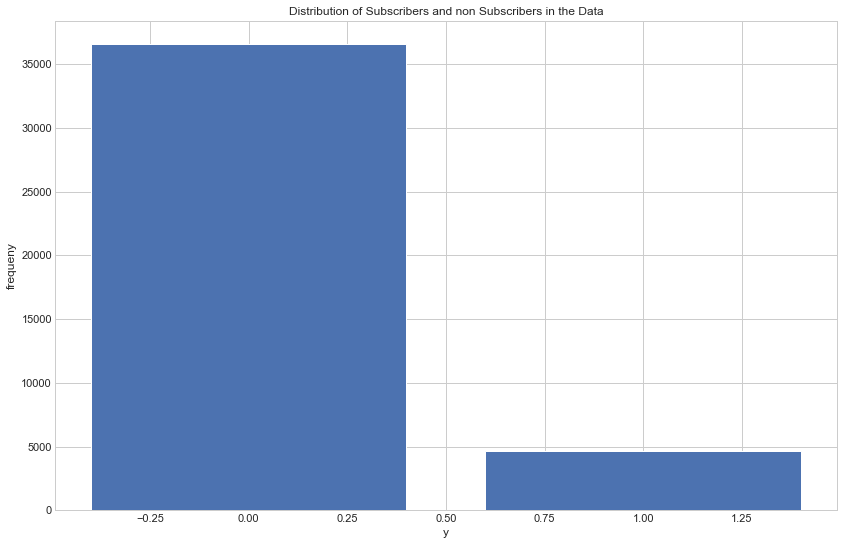

In [1883]:
plt.bar(df.y.value_counts().index, df.y.value_counts().values)
plt.xlabel('y')
plt.ylabel('frequeny')
plt.title("Distribution of Subscribers and non Subscribers in the Data")
plt.show();

In [1881]:
df['y'] = df['y'].map({'yes':1,'no':0}).astype('int')

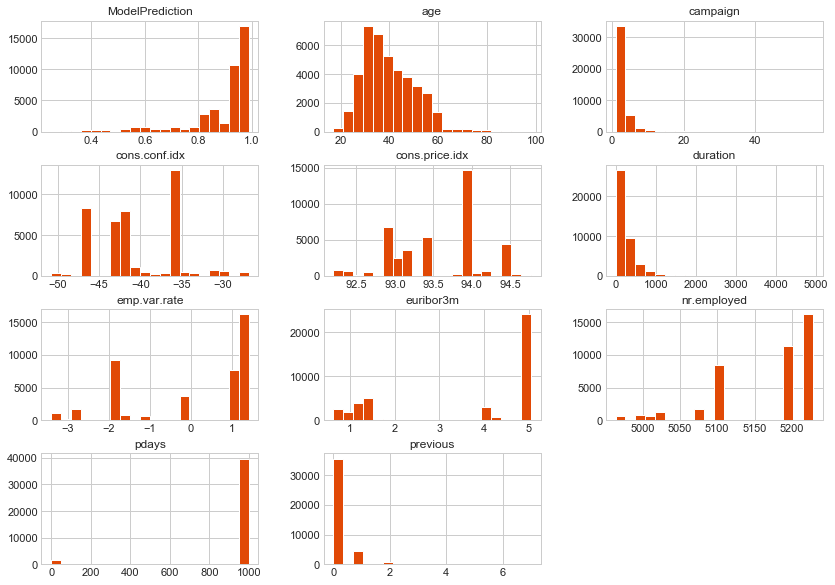

In [1253]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show();

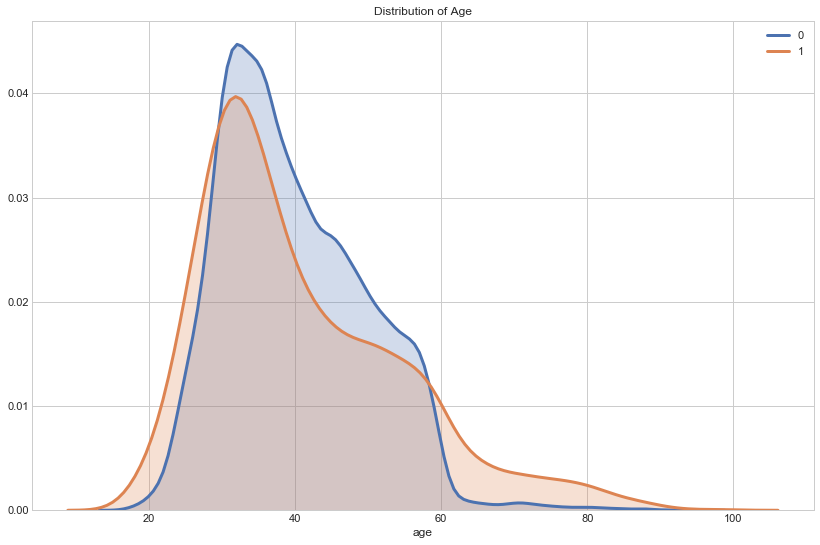

In [1882]:
for i in [0,1]:
    x = df['age'][df['y']==i]
    sns.distplot(x,hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = i)
plt.title("Distribution of Age")
plt.legend()
plt.show();

In [1885]:
df['age'][df['y']==0].describe()

count    36548.000000
mean        39.911185
std          9.898132
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         95.000000
Name: age, dtype: float64

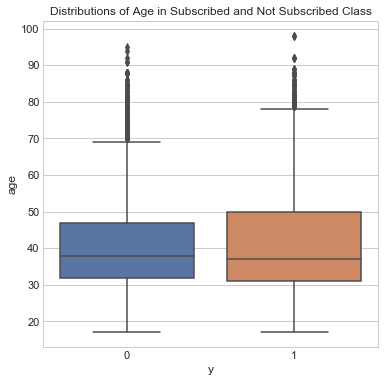

In [1255]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x = df['y'], y = df['age'])
plt.title('Distributions of Age in Subscribed and Not Subscribed Class')
plt.show();

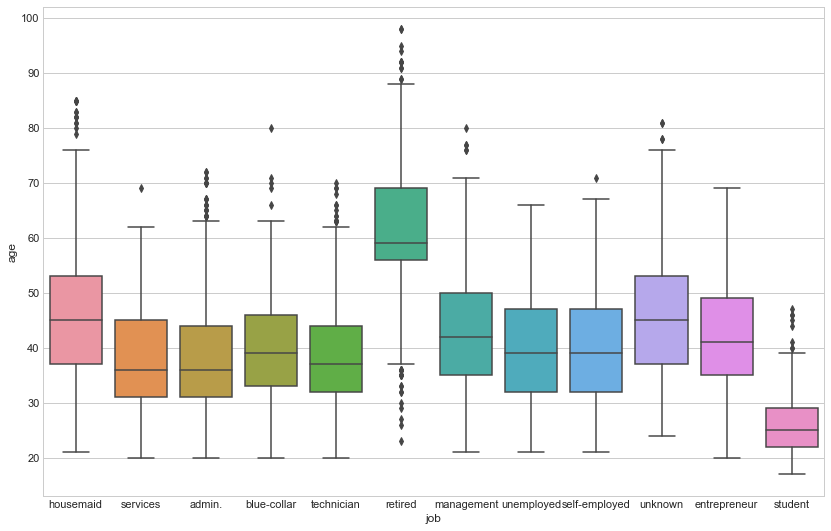

In [1887]:
sns.set(rc={'figure.figsize':(14,9)})
plt.style.use('seaborn-whitegrid')
sns.boxplot(x = df['job'], y = df['age'])
plt.show();

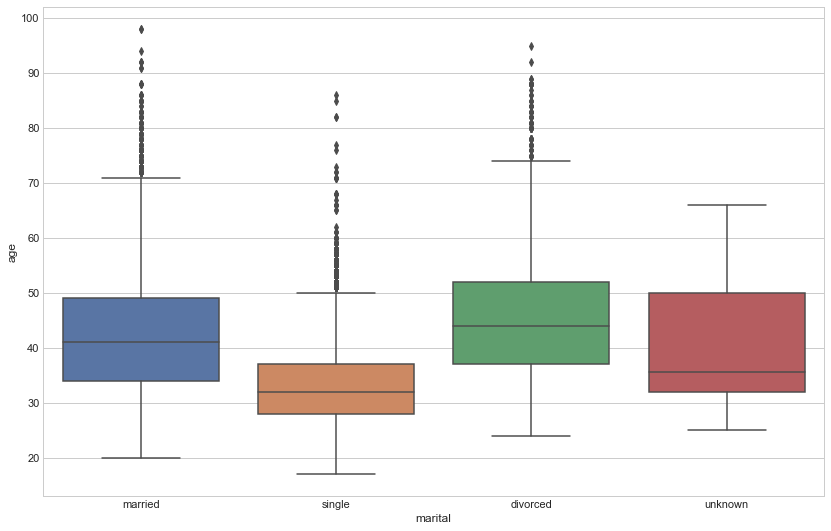

In [1735]:
plt.style.use('seaborn-whitegrid')
sns.boxplot(df['marital'],df['age'])
plt.show();

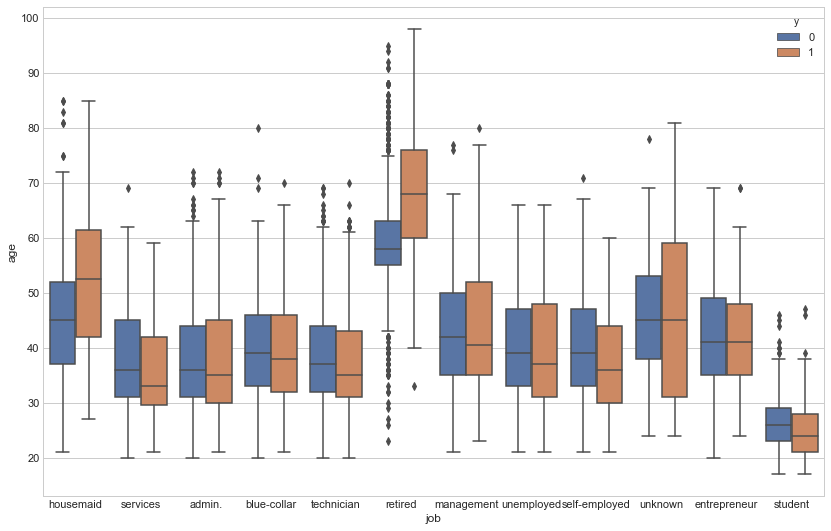

In [1734]:
sns.boxplot(df.job,df.age,hue=df.y)
plt.show();

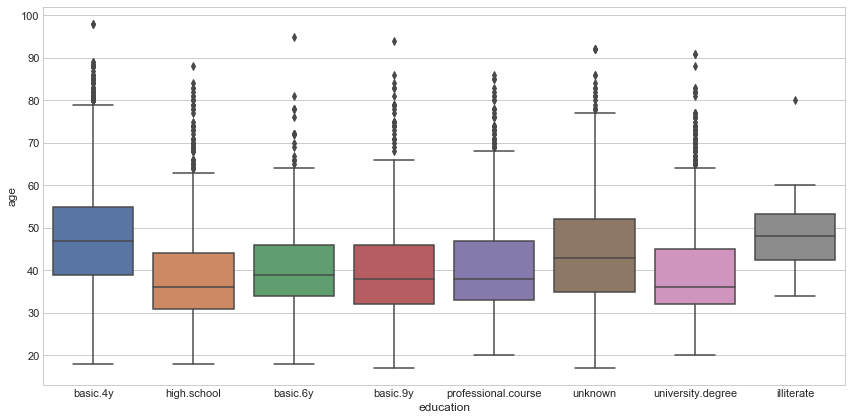

In [1737]:
fig = plt.subplots(figsize=(12,6))
plt.style.use('seaborn-whitegrid')
sns.boxplot(df['education'],df['age'])
plt.tight_layout();

In [1738]:
def plot_cross_tab(x,y):
    ct = pd.crosstab(x,y)
    ct = ct.sort_values(1, ascending = False)
    ct_index = pd.crosstab(x,y, normalize = 'index')
    ct_index = ct_index.sort_values(1, ascending = False)
    width = 0.5
    
    fig, ax = plt.subplots(2,2,figsize = (9,6))
    
    plt.subplot(2,2,1)
    plt.barh(x.value_counts().index,x.value_counts().values)
    plt.xticks(rotation='0')
    plt.title('Constitution of categories in the data')
    plt.xlabel('count')
    
    plt.subplot(2,2,2)
    plt.barh(ct.index,ct[1])
    plt.title('Distribution of Subscribed Clients')
    plt.xticks(rotation='0')
    plt.xlabel('count')
    
    plt.subplot(2,2,3)
    plt.barh(ct.index,ct[0],color = 'dodgerblue')
    plt.xticks(rotation='0')
    plt.title('Distribution of not Subscribed Clients')
    plt.xlabel('count')
    
    plt.subplot(2,2,4)
    plt.barh(ct_index.index,ct_index[1]*100, color = 'darkorange')
    plt.xticks(rotation='0')
    plt.title('Conversion Rate')
    plt.xlabel('% Converted')
    
    plt.tight_layout()

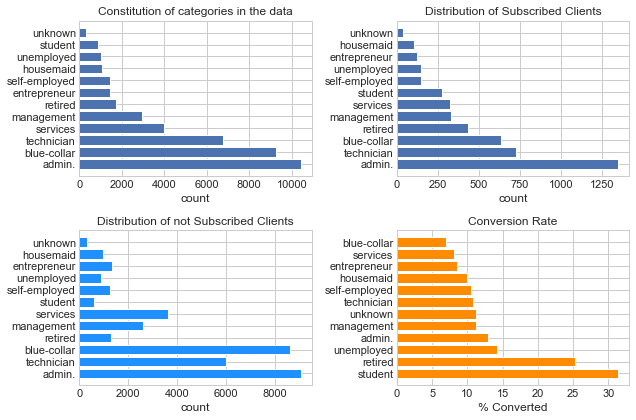

In [1739]:
plot_cross_tab(df.job,df.y)

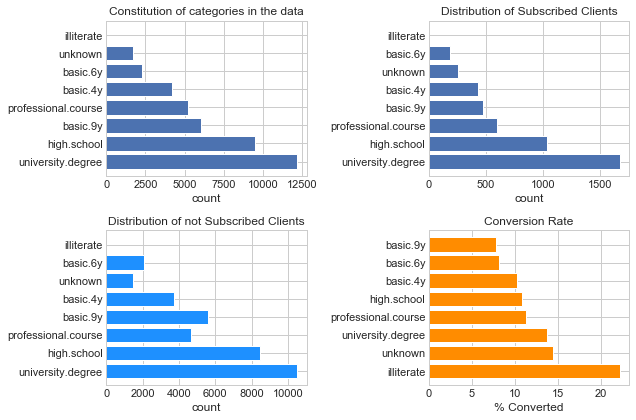

In [1741]:
plot_cross_tab(df.education,df.y)

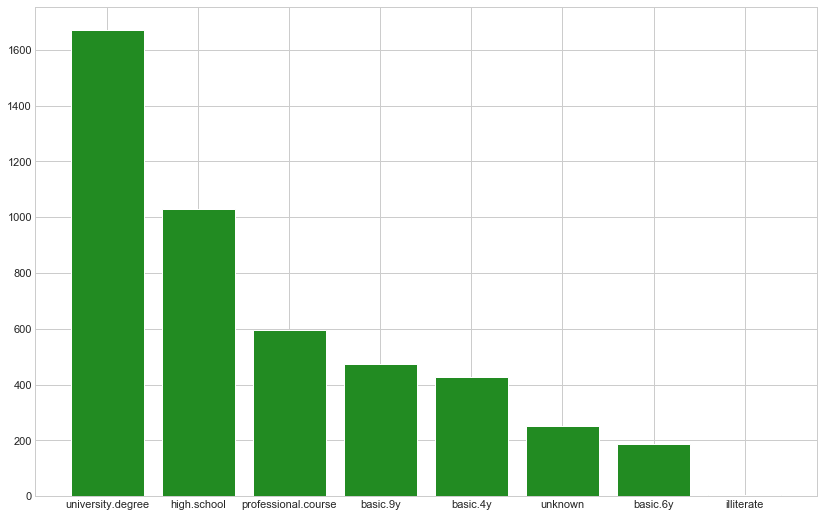

In [1899]:
plt.bar(df['education'][df['y']==1].value_counts().index,df['education'][df['y']==1].value_counts().values,color = 'forestgreen')
plt.show();

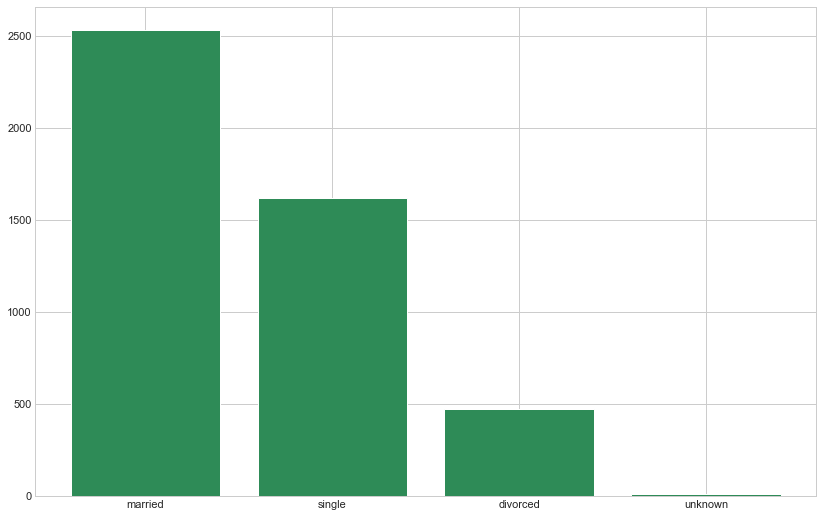

In [1891]:
plt.bar(df['marital'][df['y']==1].value_counts().index,df['marital'][df['y']==1].value_counts().values,color = 'seagreen')
plt.show();

In [1758]:
ct = pd.crosstab(df['education'][df['education']=='illiterate'], df['y'], margins = True)
ct

y,0,1,All
education,,,
illiterate,14,4,18
All,14,4,18


As there are only 18 illiterates in the data, and 4 of them are subscribed we cannot suggest that we need to concentrate more on illiterates more. 

In [1765]:
ct = pd.crosstab(df['education'][df['education']=='unknown'], df['y'], margins = True)
ct

y,0,1,All
education,,,
unknown,1480,251,1731
All,1480,251,1731


There are 1480 members whose eductional background is unknown. It would be helpful to know their details as they have high conversion rate at 14% 

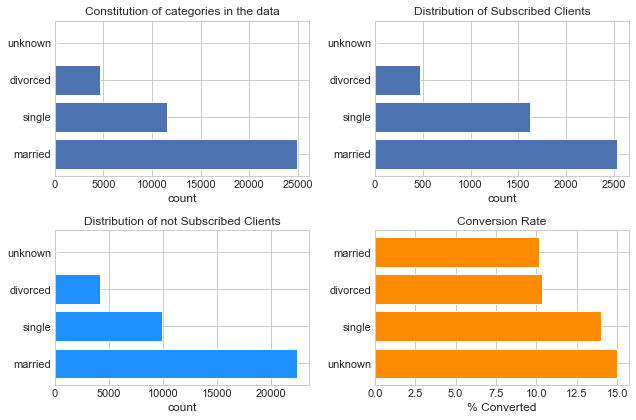

In [1766]:
plot_cross_tab(df.marital,df.y)

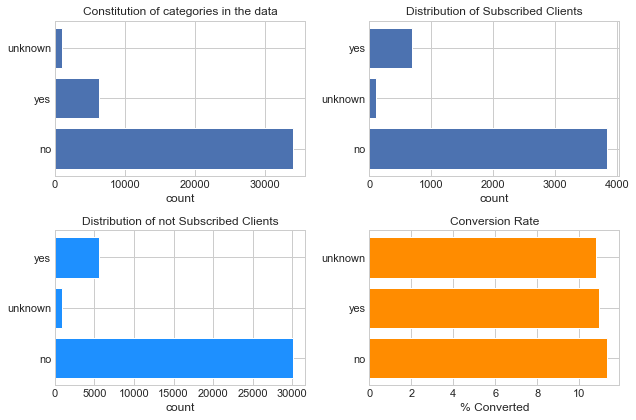

In [1728]:
plot_cross_tab(df.loan,df.y)

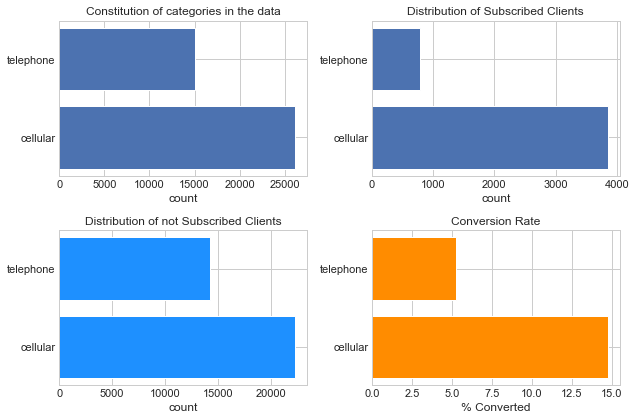

In [1706]:
plot_cross_tab(df.contact,df.y)

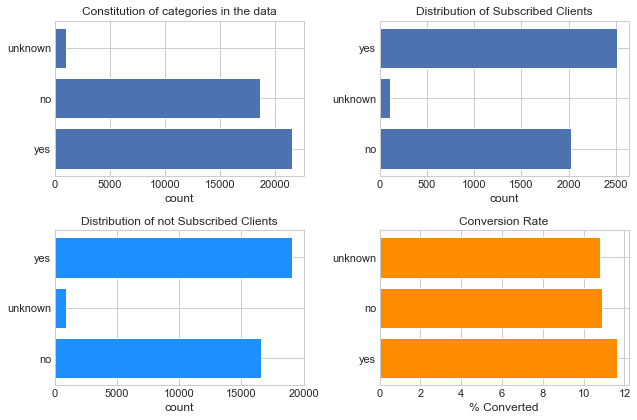

In [1729]:
plot_cross_tab(df.housing,df.y)

<BarContainer object of 3 artists>

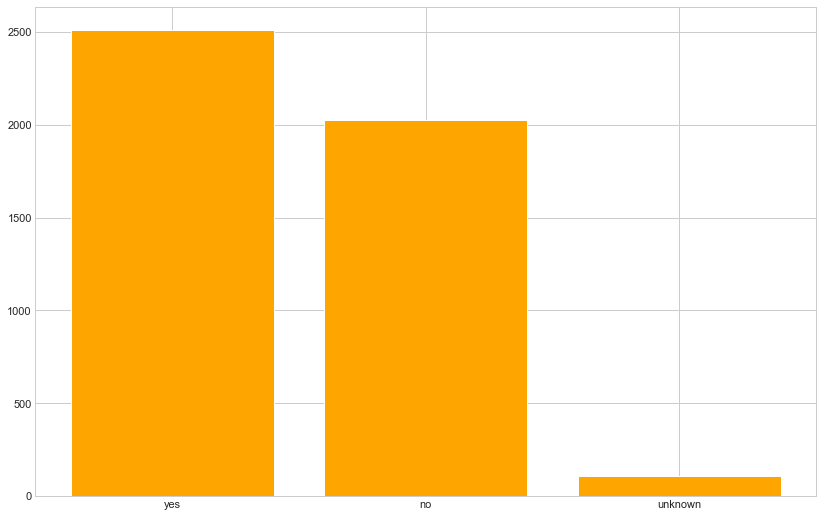

In [1906]:
plt.bar(df['housing'][df['y']==1].value_counts().index, df['housing'][df['y']==1].value_counts().values, color ='orange')


<BarContainer object of 3 artists>

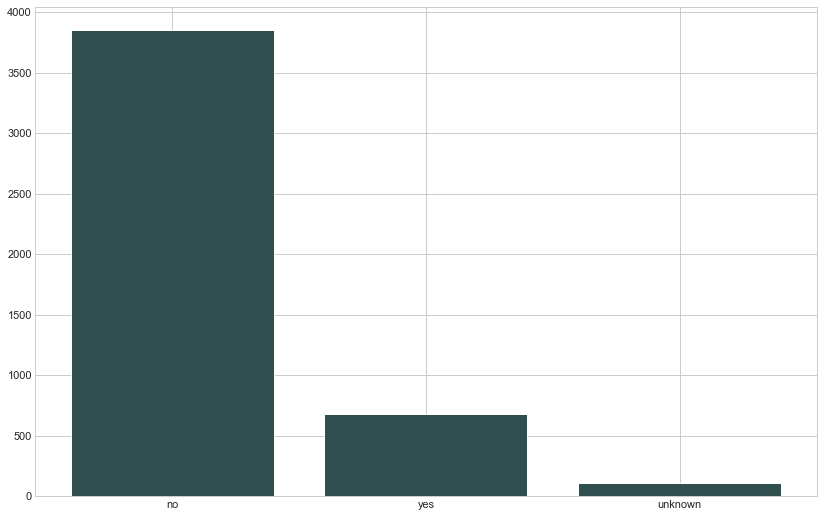

In [1905]:
plt.bar(df['loan'][df['y']==1].value_counts().index, df['loan'][df['y']==1].value_counts().values,color = 'darkslategray')

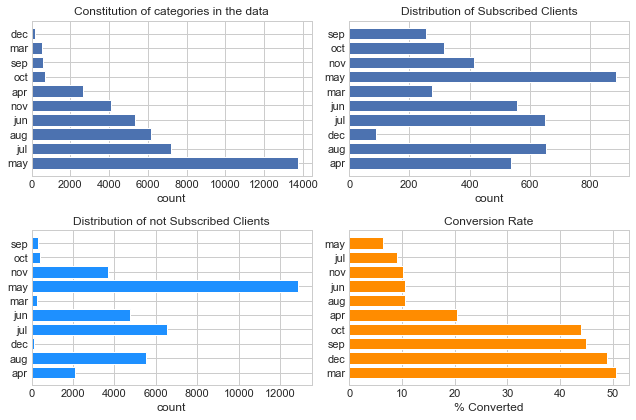

In [1730]:
plot_cross_tab(df.month,df.y)

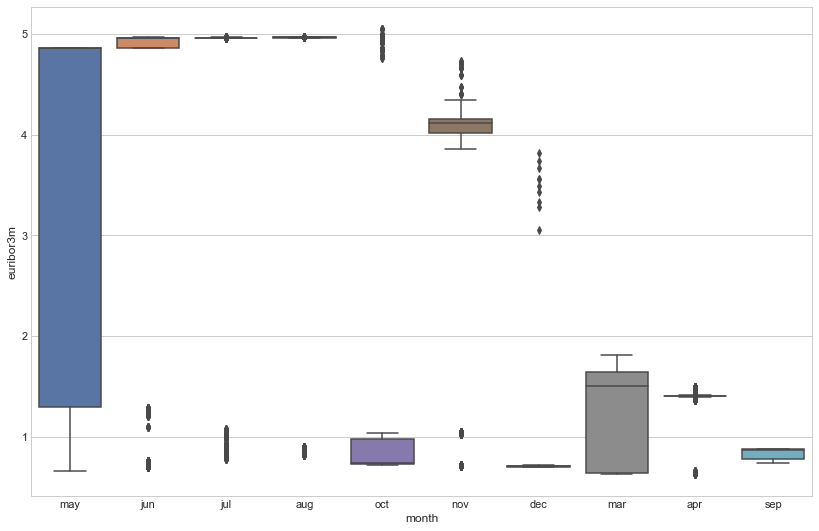

In [1908]:
sns.boxplot(df['month'],df['euribor3m'])

Investigate why the campign is aggresive in summer months of April, May, june, july and august and followed by November. In September, october, and march, December a few clients are contacted depiste having high conversion rate.  

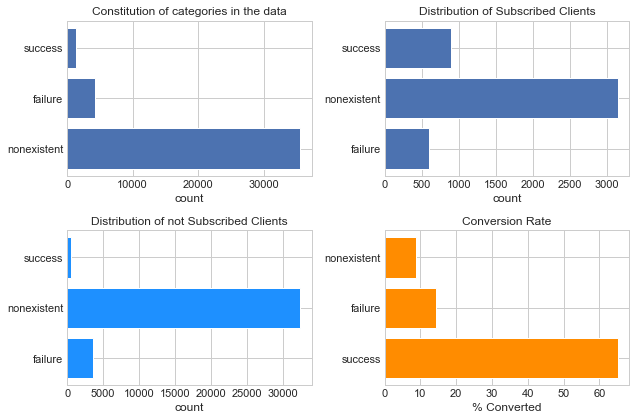

In [1731]:
plot_cross_tab(df.poutcome,df.y) #look at conversion rate of Success

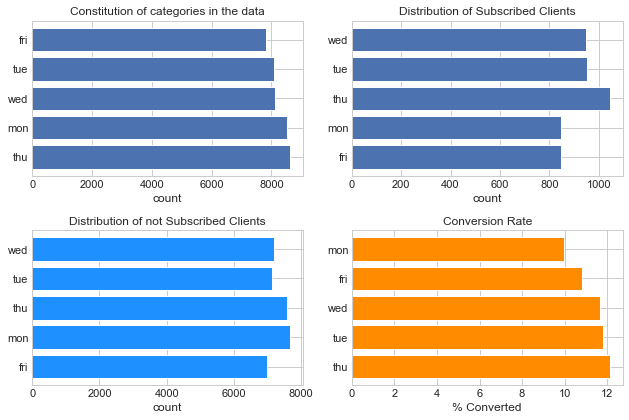

In [1732]:
plot_cross_tab(df.day_of_week, df.y)

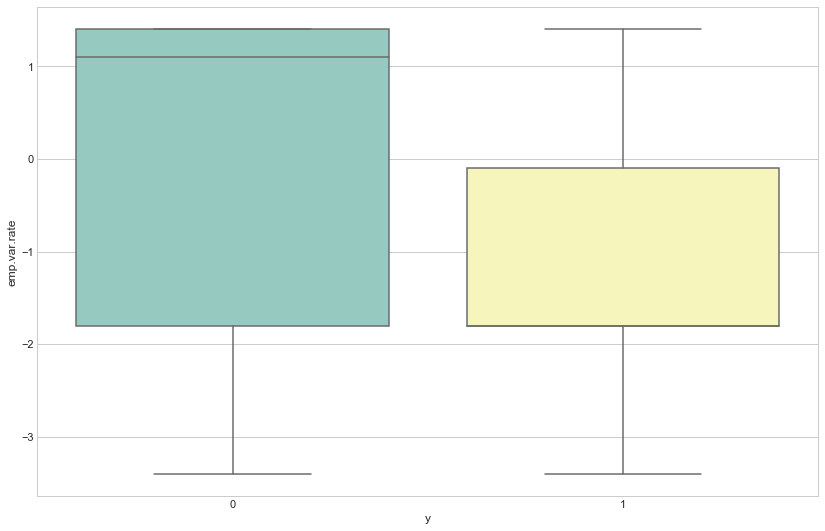

In [1915]:
sns.boxplot(df['y'],df['emp.var.rate'],palette = 'Set3')
plt.show();

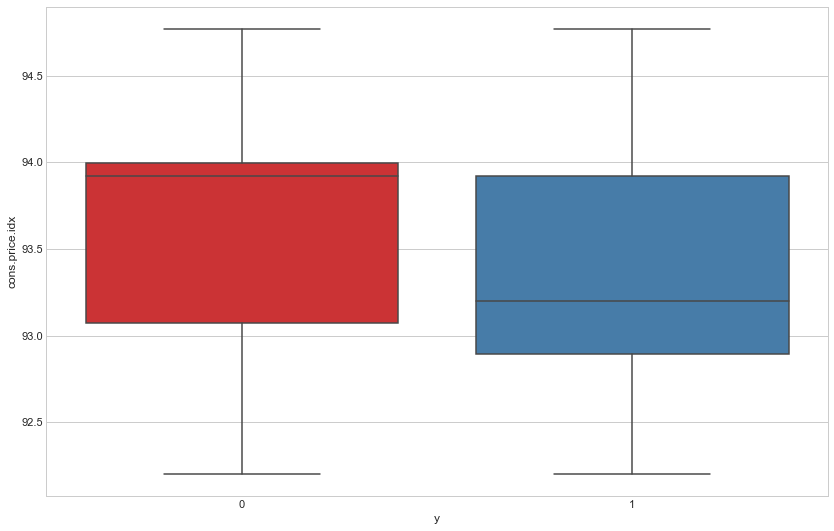

In [1919]:
sns.boxplot(df['y'],df['cons.price.idx'], palette = 'Set1')
plt.show()

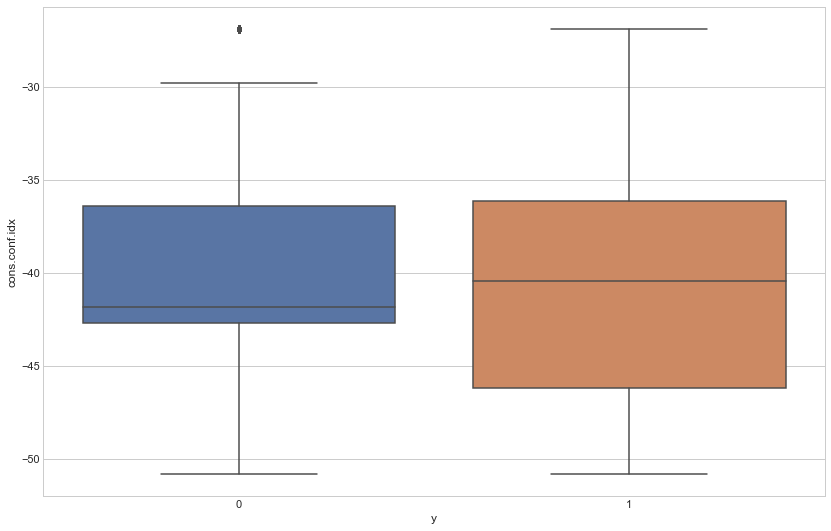

In [1913]:
sns.boxplot(df['y'],df['cons.conf.idx'])

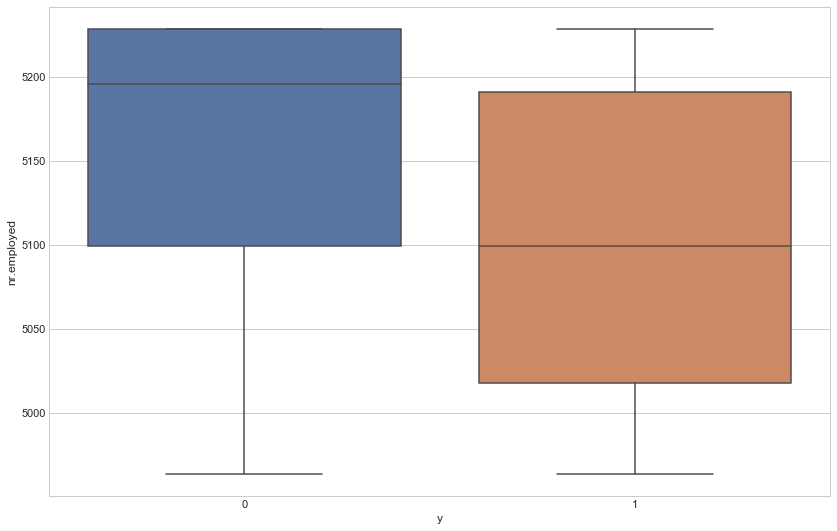

In [1914]:
sns.boxplot(df['y'],df['nr.employed'])

In [1733]:
first_contact = float(len(df['pdays'][df['pdays']==999]))/float(len(df['pdays']))
print("Percentage of people that is being contacted for the first time: "+"{:.2%}".format(first_contact));

Percentage of people that is being contacted for the first time: 96.32%


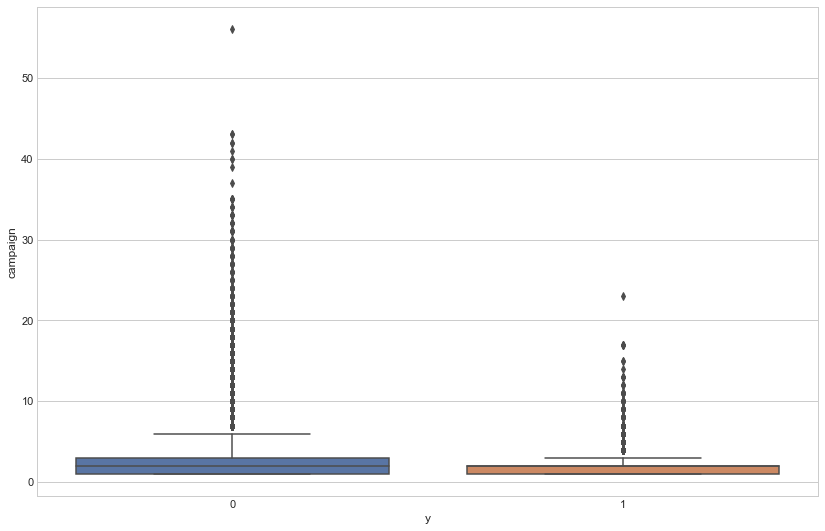

In [1925]:
sns.boxplot(df['y'],df['campaign'])

In [1927]:
print(df['campaign'][df['y']==0].describe())
print(df['campaign'][df['y']==1].describe())

count    36548.000000
mean         2.633085
std          2.873438
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
count    4640.000000
mean        2.051724
std         1.666245
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        23.000000
Name: campaign, dtype: float64


## Evaluation of Current Model

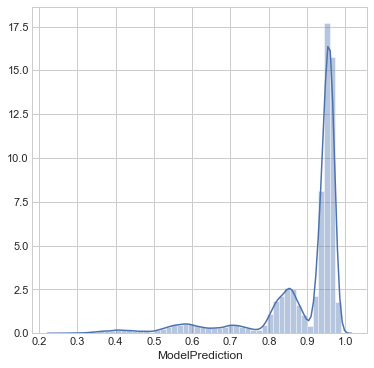

In [1928]:
fig = plt.subplots(figsize = (6,6))
sns.distplot(df.ModelPrediction )#Flexibly plot a univariate distribution of observations.
plt.show();

In [1929]:
#How many No's are there for a single yes in y ? Is this Imbalenced dataset ? What should be the approach ? 

a,b = df['y'].value_counts()
print(str(int(a/b)) +':'+ '1')
print(a,b)

7:1
36548 4640


In [1930]:
Mp_list = list(df['ModelPrediction'])

In [1931]:
#probability distribition functions of predicted P(y=0|X) and P(y=1|X)
y_list = df['y']
def pdf(list):
    pdf1= []
    pdf2 = []
    for i in range(len(list)):
        if y_list[i] == 1:
            pdf1.append(list[i])
        elif y_list[i] == 0:
            pdf2.append(list[i]) 
    return pdf1, pdf2

pdf1, pdf2 = pdf(MP_list)                  

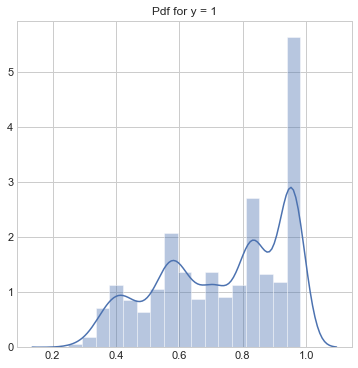

In [1932]:
fig = plt.subplots(figsize = (6,6))
sns.distplot(pdf1)
plt.title('Pdf for y = 1')
plt.show();

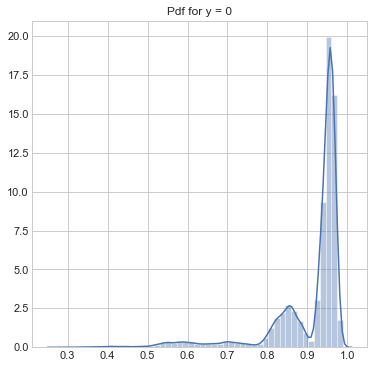

In [1933]:
fig = plt.subplots(figsize = (6,6))
sns.distplot(pdf2)
plt.title('Pdf for y = 0')
plt.show();

### Choice of Evaluation Metrics
<ol>
<li> As we can see the given data is an imbalanced data having majority class as non subscribers and minority class as subscribers. </li> <br>
<li> We cannot use Accuracy as the metric to evaluate the model used to predict the subscribers because of the imbalance in the data. The model can get away with high accuracy by predicting every client as non subscribers, which then doesn't make sense of developing a model.</li> <br>
<li> Our main objective should be avoiding the miss-classification of minority class, since if we miss-classify them we are loosing potential subscriber, which in this case is costlier than miss-classifying majority class. If we missclassify the majority class at most we loose the resources spent on campigning for that client</li> <br>
<li> However, we need also make sure that we don't predict every one as subscribers, that leads to investing in campigning more and get less return on investment </li> <br>
<li> Therefore the logical thing would be is to find a balance between the both and make sure that we are not loosing many potentianl clients also not predicting many of the clients as potential subscribers even if they aren't </li> <br>
 <li> In machine learning modelling for classification the first condition will be addressed by metric called Recall  and second condition by Precision</li> <br>
  <li> Recall tell us - out of all subscribers how many of them were predicted that they will subscribe, where as precision tells that out of total predicted subscribers, how many of them actually subscribed </li> <br>
  <li> There is a fine difference between Recall and Precision. We want both oh them to be as high as possible. However, that will be not possible because when calculating for different thresholds they are inversly proportional to each other. It makes difficult to decide what would be right values to say that model is doing well. <br> <br> <b>Hence, I here chose "F1Score" as my primary metric to evaluate the model. This F1Score is the harmonic mean of recall and precision. The optimal threshold to classify would be where the F1Score maximizes </b> </li> 
<br>

    


  

In [1934]:
# ROC Plot, Calculate Confusion Matrix, precision, Recall, fScore. 
# tn, fp, fn, tp 
from sklearn.metrics import confusion_matrix
def calculate_metrics(y_test_probs,y_test,threshold_start):
    tpr_list = []
    fpr_list = []
    precision = []
    f1score = {}
    for threshold in np.arange(threshold_start,1,0.01):
        y_pred = []
        for i in range(len(y_test_probs)):
            if y_test_probs[i]>=threshold:
                y_pred.append(1)
            else:
                y_pred.append(0)
        tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        psc = tp/(tp+fp)
        precision.append(psc)
        f1score[threshold] =(tpr*psc/(tpr+(4*psc)))
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    optimal_threshold, f1score = max(f1score.items(), key=operator.itemgetter(1))
    
    return tpr_list,fpr_list,precision, optimal_threshold, f1score

In [1935]:
def plot_roc_curve(fpr_list,tpr_list):
    plt.style.use('seaborn-whitegrid')
    fig = plt.subplots(figsize=(6,6))
    plt.plot(fpr_list, tpr_list, label='ROC Curve')
    plt.plot([0,1],[0,1],"k--", label = 'No SKill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show();


In [1936]:
def plot_precision_recall(tpr_list,precision, y_test):
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.style.use('seaborn-whitegrid')
    fig = plt.subplots(figsize=(6,6))
    plt.plot(tpr_list,precision, label='Precision - Recall Curve')
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

In [1937]:
def optimal_threshold_values(y_test_probs, y_list, optimal_threshold):
    index = ['accuracy','roc_auc','Recall', 'Precision','f1_score']
    metrics = pd.Series(index = index)
    y_test_preds= []
   
    for p in y_test_probs:
        if p > optimal_threshold:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
    
    metrics[0] = (accuracy_score(y_list,y_test_preds))
    metrics[1] = (roc_auc_score(y_list, y_test_preds))
    metrics[2] = (recall_score(y_list,y_test_preds))
    metrics[3] = (precision_score(y_list,y_test_preds))
    metrics[4] = (f1_score(y_list,y_test_preds))
    
    return metrics, y_test_preds
    

In [1938]:
y_list = df['y'].values
tpr_list,fpr_list,precision, optimal_threshold, f1score = calculate_metrics(Mp_list,y_list,0)

In [1939]:
print(optimal_threshold, f1score)

0.0 0.07765950324697062


### Note:
<ul>
    <li> From above we can see that the optimal threshold when f2score is maximum is 0. <br> 
 <br> <li><b> This leads the model to predict every member as subscribers and this is highly undesirable </b> </li>
 </ul>

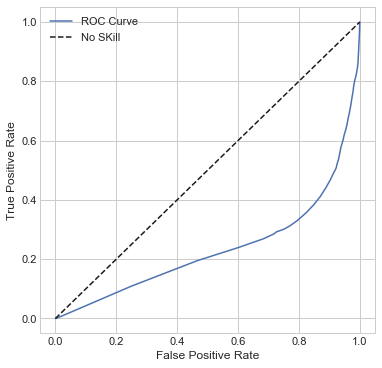

In [1940]:
plot_roc_curve(fpr_list,tpr_list)

### Note: 
<ul>
    <li> The above ROC curve has area under the curve less than 0.5.</li> <br>
    <li> This indicates that the present model is not doing a good job in differentiating the two classes. <br> Moreover, it tends to classify 0's as 1's </li> <br> 
    <li>This statement can be backed by the fact that FPR False Positive rate is increasing more for increased threshold than the True Positive rate which means there are more number of points classifying as a positive class where in reality they do not belong to that class.</li> <br> 
</ul>

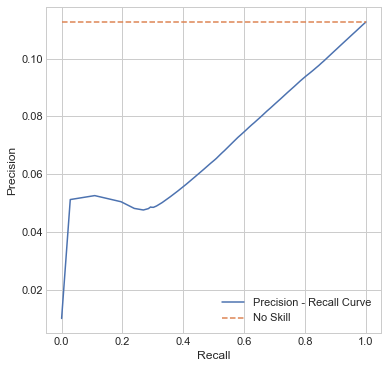

In [1941]:
plot_precision_recall(tpr_list,precision, y_list)

### Note: 
<ul>
    <li> From Precision - Recall curve we can say the model is performing worse than the predictions made randomly with no skill. </li>

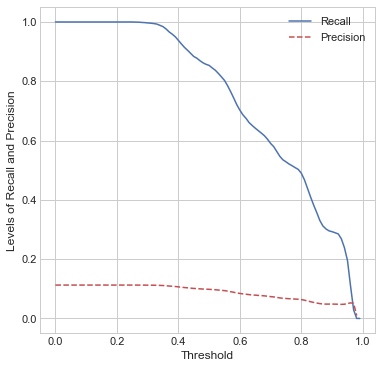

In [1942]:
threshold = np.arange(0,1,0.01)
fig = plt.subplots(figsize=(6,6))
plt.plot(threshold,tpr_list, label='Recall')
plt.plot(threshold,precision,'r--',label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Levels of Recall and Precision')
plt.legend()
plt.show();


In [1943]:
metrics_given_model, y_preds = optimal_threshold_values(Mp_list,y_list,optimal_threshold)

In [1944]:
metrics_given_model

accuracy     0.112654
roc_auc      0.500000
Recall       1.000000
Precision    0.112654
f1_score     0.202496
dtype: float64

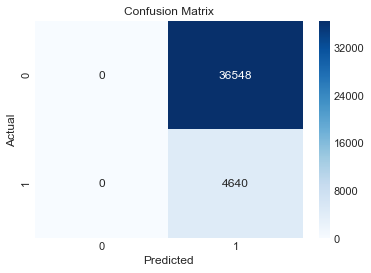

In [1945]:
cm = confusion_matrix(y_list,y_preds)

def plot_cm_heatmap(cm):
    fig, ax = plt.subplots(figsize= (6,4))
    sns.heatmap(cm,annot=True, cmap="Blues", fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show();

plot_cm_heatmap(cm)

## Report on Current Model:

The current Model being used predicts everyone as subscribers at calculated optimal threshold value (threshold where F2Score is maximum).<br> <br>When we look at above confusion matrix we can see that we are predicting all the 41,118 members as subscribers however only 4,640 members in the data are subscribers. <br>

<h4> Based on the evaluation metric F2 Score, this model is rendered useless as it is classifying every one as subscribers. <br>
<br> <br>It would be only logical to build new models to predict.</h4> 

## Inverse of the ModelPrediction 
<ul>
    <li> Look at the Box plot below, as mentioned before it shows that the current model probability(Y=1) i.e probability of subscribing predictions are higher for actual class y = 0 than for y = 1 </li> <br>
    <li> Due to this higher probabilities the model is classifing a client as subscriber even when it is not the case, also which is evident from above analysis </li> <br><br>
    <li> But what if the probabilities are reversed ? That is subtracted from 1. Thus we can get new Model Predictions by subtracting current ModelPredictions from 1. This can be considered as a new model built by tuning the current model. The new model will have higher probability predictions for minority class, which is generally expected for a good model.</li>
    <br>
    <br>
    <li> The New ModelPredictions would predict the Probability(y = 1) that is probability of subscribing, only the values will be changed by subtracting from 1 </li>
    <br>
    <li><i> df['ModelPreictions_new'] = 1 - df['ModelPredictions']</i>
        

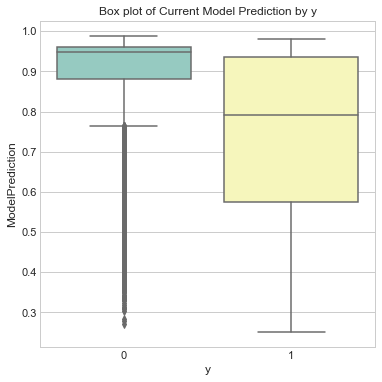

In [1946]:
fig = plt.subplots(figsize = (6,6))
sns.boxplot(x = df['y'], y = df['ModelPrediction'], palette = "Set3")
plt.title('Box plot of Current Model Prediction by y')
plt.show();

In [1947]:
df['ModelPrediction_new'] = 1 - df['ModelPrediction'] 

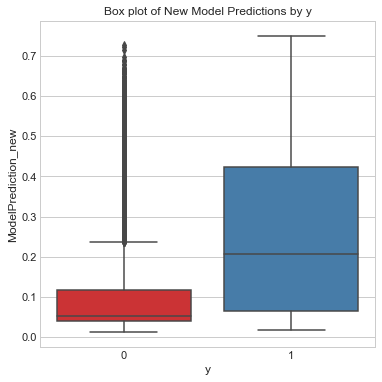

In [1948]:
fig = plt.subplots(figsize = (6,6))
sns.boxplot(x = df['y'], y = df['ModelPrediction_new'], palette = "Set1")
plt.title('Box plot of New Model Predictions by y')
plt.show();

### Note:
<ul>
    <li> As expected the probabilities for class y = 0 are lower than the other.</li>
    <br>
    <li> Following we will evaluate this new model by the same metrics that are used to evaluate the previous.</li> 

In [1949]:
New_MP_list = df['ModelPrediction_new']
tpr_list,fpr_list,precision, optimal_threshold, f1score = calculate_metrics(New_MP_list,y_list,0)

In [1950]:
print(optimal_threshold, f1score)

0.15 0.10667143623680916


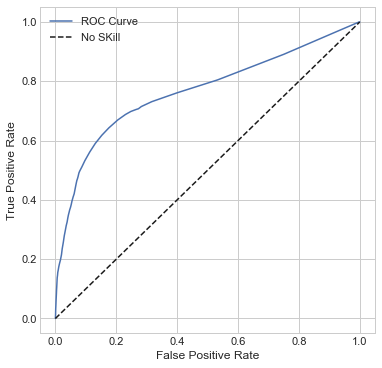

In [1951]:
plot_roc_curve(fpr_list,tpr_list)

### Note:
It is evident that new model is better than the current model. As the area under curve is greater that 0.5, indicating model is able to certail extent to differetiate between the classes 

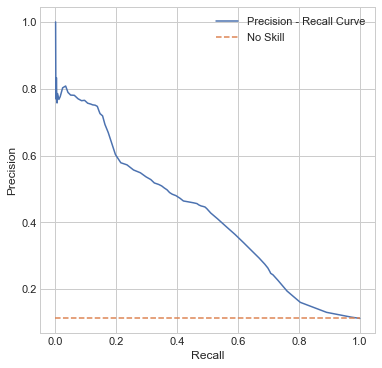

In [1952]:
plot_precision_recall(tpr_list,precision,y_list)

In [1953]:
metrics_new_model, y_preds = optimal_threshold_values(New_MP_list,y_list,optimal_threshold)
print(metrics_new_model)

accuracy     0.804045
roc_auc      0.733602
Recall       0.642672
Precision    0.317403
f1_score     0.424938
dtype: float64


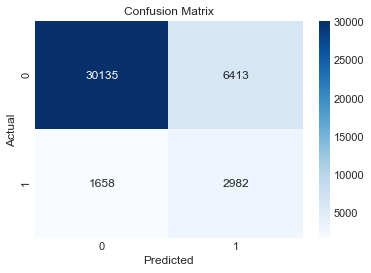

In [1954]:
cm = confusion_matrix(y_list,y_preds)

def plot_cm_heatmap(cm):
    fig, ax = plt.subplots(figsize= (6,4))
    sns.heatmap(cm,annot=True, cmap="Blues", fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show();

plot_cm_heatmap(cm)

### Inversed Model
<ul>
    <li> It is so clear that the new inversed model is better than the given model. The inversed model is able to classify the data rather than just assignig label '1' to all the clients</li> <br> 
</ul>
    

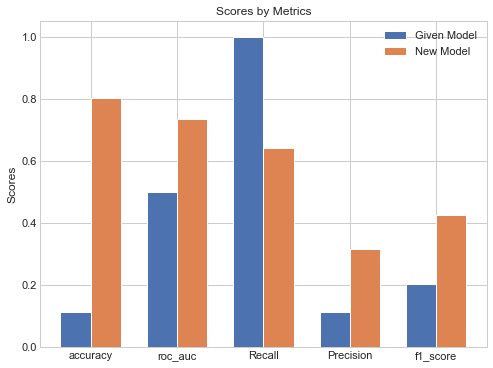

In [1955]:
fig, ax = plt.subplots(figsize = (8,6))
labels = metrics_given_model.index
x = np.arange(len(labels))
width = 0.35
rects1 = ax.bar(x - width/2, metrics_given_model, width, label='Given Model')
rects2 = ax.bar(x + width/2, metrics_new_model, width, label='New Model')
ax.set_ylabel('Scores')
ax.set_title('Scores by Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show();

### Observations:
<ol>
    <li> The Major change can be observed in Accuracy, though accuracy can sometimes be deceiving in evaluating models, we expect at least to have a decent accuracy which the given model failed to deliver. The inversed model has accuracy of 80%</li>
    <br>
    <li> ROC Area under the curve is well above 0.5 as mentioned before this tells that the model is performing better than no-skill which also failed in given model </li>
    <br>
    <li> Now, when we look at recall, the inversed model has recall less than the given model but that is due to there are no False negatives as every datapoint is classified as 'class y= 1'. Except for this the given model is not doing anything to keep  Recall high</li> 
    <br>
    <li> Precision incresed and also f2_score increased. Every metric is explicitly suggesting the new inversed model is better than the given. </li>

#### Observation:
Out of all subscribers about 30% constistute admin. job holders the highest, follwed by technicians and blue collars at 16% and 14% respectively. The members in these three categories alone are about 60% of all subscribers. 

An interesting observation from above graphs, when we look at percentage of conversion i.e no:of people subscribing after the campaign in thier category we can see that Students and retired people are more. Nearly 32% and 25% of all students and retired members are subscribing compared to just 12.9% of members belong to admin category.   

Of all subscribed members 54% are married and 35% are single, rest 10% are divorced. When we look at conversion rate, singles and unknowns are converting at higher rates with 14% and 15% respectively while maried and divorced have only about 10% each 

## Data Cleaning 

In [1956]:
#missing values
df.isnull().sum() == 0

#no missing values

age                    True
job                    True
marital                True
education              True
default                True
housing                True
loan                   True
contact                True
month                  True
day_of_week            True
duration               True
campaign               True
pdays                  True
previous               True
poutcome               True
emp.var.rate           True
cons.price.idx         True
cons.conf.idx          True
euribor3m              True
nr.employed            True
ModelPrediction        True
y                      True
ModelPrediction_new    True
dtype: bool

In [1957]:
#dummy variables for categorical columns
columns=df.select_dtypes(include=[object]).columns
df2=pd.concat([df,pd.get_dummies(df[columns])],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 76 columns):
age                              41188 non-null int64
job                              41188 non-null object
marital                          41188 non-null object
education                        41188 non-null object
default                          41188 non-null object
housing                          41188 non-null object
loan                             41188 non-null object
contact                          41188 non-null object
month                            41188 non-null object
day_of_week                      41188 non-null object
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null object
emp.var.rate                     41188 non-null float64
cons.price.idx 

In [1958]:
#dropping columns
for c in columns:
    df2 = df2.drop(c,axis = 1)

In [1959]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 66 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
ModelPrediction                  41188 non-null float64
y                                41188 non-null int32
ModelPrediction_new              41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid

In [1960]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign

#Convert into a category column 0 indicating not contacted previously and 1 - contacted previous

def pdayswork(pdays):
    if(pdays == 999):
        return(0)
    elif(pdays >= 0):
        return(1)
df2['pdays2'] = df2['pdays'].apply(pdayswork)


In [1961]:
df2 = df2.drop(['pdays'], axis = 1)

In [1962]:
df2 = df2.drop(['ModelPrediction'], axis = 1)

In [1963]:
df2 = df2.drop(['ModelPrediction_new'], axis = 1)

In [1964]:
df2 = df2.drop(['duration'], axis = 1)

In [1965]:
df2['y']=df2['y'].astype(int)

#### Splitting the dataset into Train and Test

In [1966]:
X=df2.drop(columns=['y']).values
y=df2['y'].values

In [1967]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
x = df2.drop('y',axis=1)
y = df2['y']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Logistic Regression 

In [1968]:
lg2 = LogisticRegression(random_state=13, class_weight="balanced")
# fit it
lg2.fit(X_train,y_train)
# test set probabilities 
y_test_probs = lg2.predict_proba(X_test)[:,1]


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=13,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [1969]:
tpr_list,fpr_list,precision, optimal_threshold, f1score = calculate_metrics(y_test_probs,y_test,0)

In [1970]:
print(optimal_threshold, f1score)

0.53 0.10844603215105895


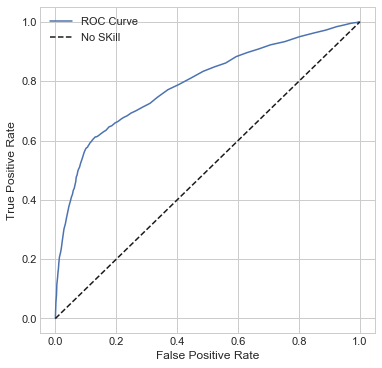

In [1971]:
plot_roc_curve(fpr_list,tpr_list)

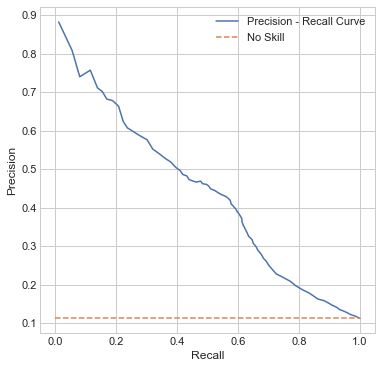

In [1972]:
plot_precision_recall(tpr_list,precision,y_test)

In [1973]:
metrics_logistic, y_preds = optimal_threshold_values(y_test_probs,y_test,optimal_threshold)
print(metrics_logistic)

accuracy     0.840252
roc_auc      0.740739
Recall       0.612392
Precision    0.371829
f1_score     0.462711
dtype: float64


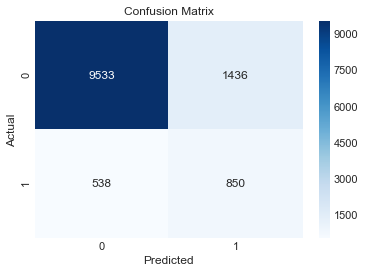

In [1974]:
cm = confusion_matrix(y_test,y_preds)

def plot_cm_heatmap(cm):
    fig, ax = plt.subplots(figsize= (6,4))
    sns.heatmap(cm,annot=True, cmap="Blues", fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show();

plot_cm_heatmap(cm)

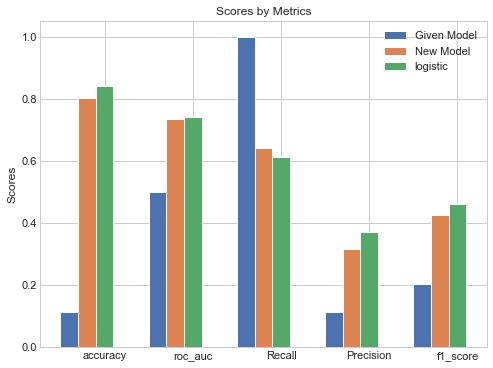

In [1975]:
fig, ax = plt.subplots(figsize = (8,6))
labels = metrics_given_model.index
x = np.arange(len(labels))
width = 0.2
rects1 = ax.bar(x-2*width , metrics_given_model, width, label='Given Model')
rects2 = ax.bar(x-width, metrics_new_model, width, label='New Model')
rects3 = ax.bar(x, metrics_logistic, width, label='logistic')
ax.set_ylabel('Scores')
ax.set_title('Scores by Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show();

## Random Forest

In [1976]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               class_weight = "balanced")
# Fit on training data
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [1977]:
model.score(X_test,y_test)

0.8920449947398236

In [1978]:
y_test_probs = model.predict_proba(X_test)[:,1]

In [1979]:
tpr_list,fpr_list,precision, optimal_threshold, f2score = calculate_metrics(y_test_probs,y_test,0)

In [1980]:
print(optimal_threshold, f2score)

0.12 0.10484806309440967


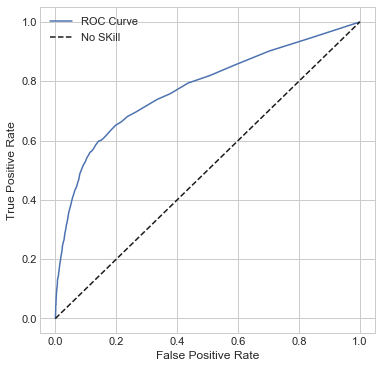

In [1981]:
plot_roc_curve(fpr_list,tpr_list)

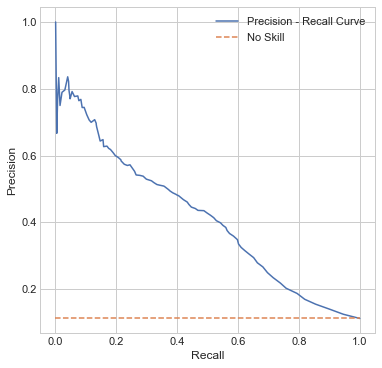

In [1982]:
plot_precision_recall(tpr_list,precision,y_test)

In [1983]:
metrics_rf, y_preds = optimal_threshold_values(y_test_probs,y_test,optimal_threshold)
print(metrics_rf)

accuracy     0.793963
roc_auc      0.725993
Recall       0.638329
Precision    0.302389
f1_score     0.410375
dtype: float64


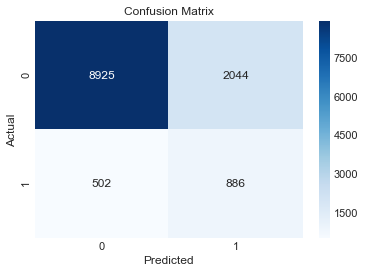

In [1984]:
cm = confusion_matrix(y_test,y_preds)

def plot_cm_heatmap(cm):
    fig, ax = plt.subplots(figsize= (6,4))
    sns.heatmap(cm,annot=True, cmap="Blues", fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show();

plot_cm_heatmap(cm)

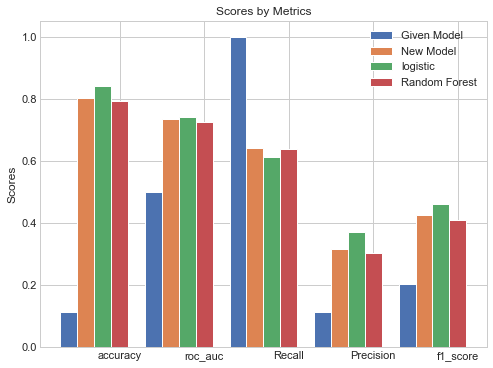

In [1985]:
fig, ax = plt.subplots(figsize = (8,6))
labels = metrics_given_model.index
x = np.arange(len(labels))
width = 0.2
rects1 = ax.bar(x-3*width , metrics_given_model, width, label='Given Model')
rects2 = ax.bar(x-2*width, metrics_new_model, width, label='New Model')
rects3 = ax.bar(x-width, metrics_logistic, width, label='logistic')
rects4 = ax.bar(x, metrics_rf, width, label='Random Forest')
ax.set_ylabel('Scores')
ax.set_title('Scores by Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show();

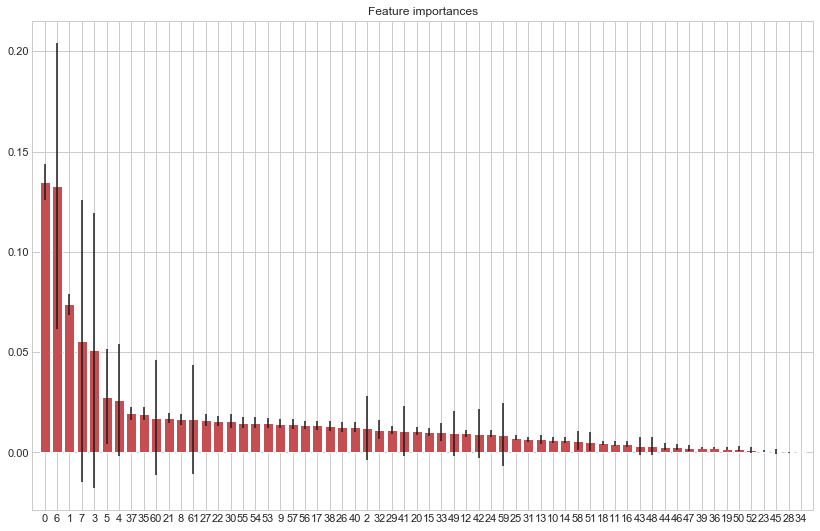

In [1989]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show();

In [1993]:
imp = []
for i in [0,6,1,7,3,5,4,37,35,60]:
    imp.append(X_train.columns[i])
print('The important features determining the classification',imp)

The important features determining the classification ['age', 'euribor3m', 'campaign', 'nr.employed', 'emp.var.rate', 'cons.conf.idx', 'cons.price.idx', 'housing_yes', 'housing_no', 'poutcome_success']
